In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

In [3]:
df = pd.read_csv('Unemployment_in_India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

Removing The rows where each row has NAN entry in each of its column.

In [12]:
df.columns
df_cleaned = df.dropna(subset=['Region'])
df_cleaned

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [11]:
df_cleaned.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

# Data Preprocessing

In [13]:
df_cleaned[' Date'] = pd.to_datetime(df_cleaned[' Date'], errors='coerce')


C:\Users\Qamrosh Maqsood\AppData\Local\Temp\ipykernel_14244\4185546192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[' Date'] = pd.to_datetime(df_cleaned[' Date'], errors='coerce')


In [14]:
df_cleaned.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [15]:
df = df_cleaned.rename(columns={df.columns[0]:'state', df.columns[3]:'EUR' , df.columns[4]:'EE',df.columns[5]:'ELPR',df.columns[6]:'Region'})
df

,state,Date,Frequency,EUR,EE,ELPR,Region
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


Calculating the Unemployment Rate using given columns

In [20]:
df['Unemployment Rate (%)'] = (df['EUR'] / df['ELPR']) * 100
df

,state,Date,Frequency,EUR,EE,ELPR,Region,Unemployment Rate (%)
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,8.441258
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,7.253270
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,8.620690
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,7.550603
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,11.571173
...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,17.124064
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,15.389940
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,37.936893
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,37.423162


# Visualization

Bar Plot of Unemployment Rate Over Time:

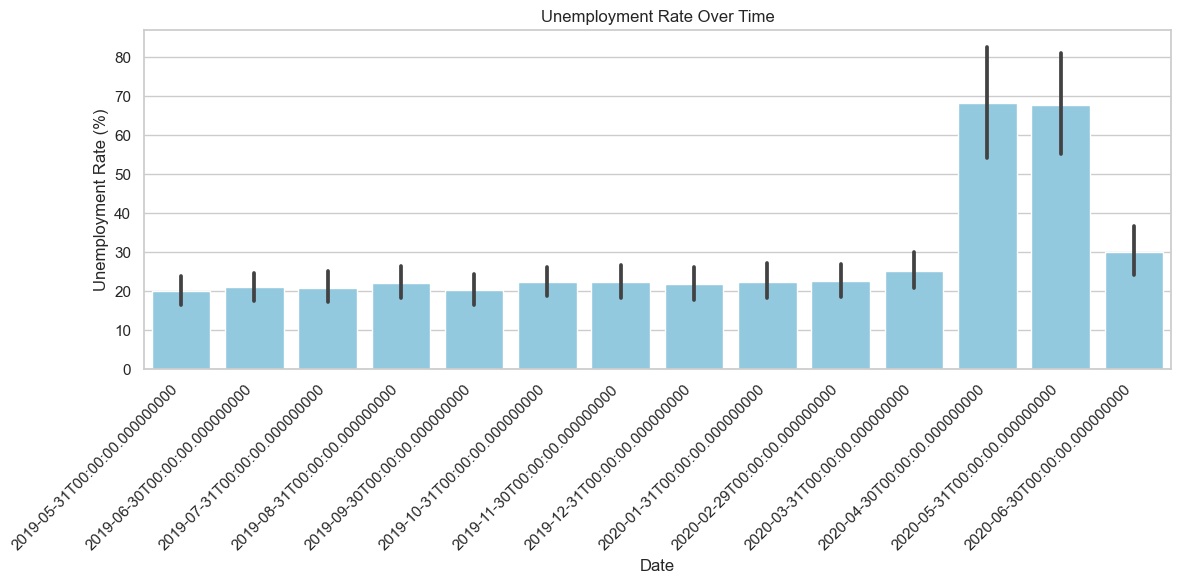

In [27]:
df[' Date'] = pd.to_datetime(df[' Date'], errors='coerce')

df['Date'] = df[' Date'].dt.strftime('%Y-%m-%d')

sns.set(style="whitegrid")
# Plotting a bar chart for the unemployment rate over time using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=' Date', y='Unemployment Rate (%)', data=df, color='skyblue')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Bar Chart of Labour Participation Rate:

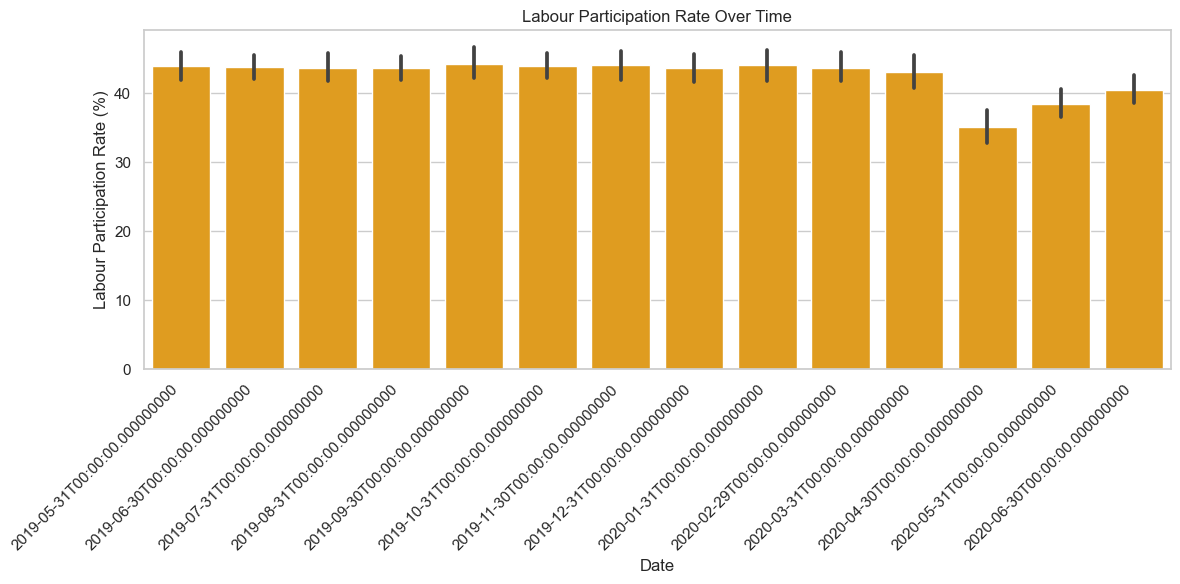

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x=' Date', y='ELPR', data=df, color='orange')
plt.title('Labour Participation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Labour Participation Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Scatter Plot between Labour Participation Rate and Unemployment Rate:



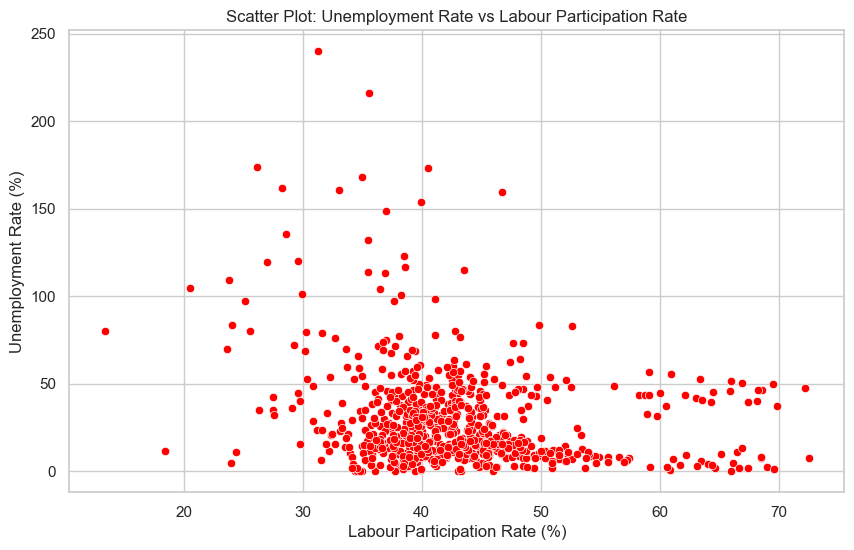

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ELPR', y='Unemployment Rate (%)', data=df, color='red')
plt.title('Scatter Plot: Unemployment Rate vs Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.show()


In [34]:
df.groupby("Region").size()


Region
Rural    359
Urban    381
dtype: int64

A heatmap is used to visualize the correlation matrix between different variables in a dataset. In this case, the variables are 'EUR' (presumably representing some economic indicator), 'EE' (another economic indicator), and 'ELPR' (Labour Participation Rate).

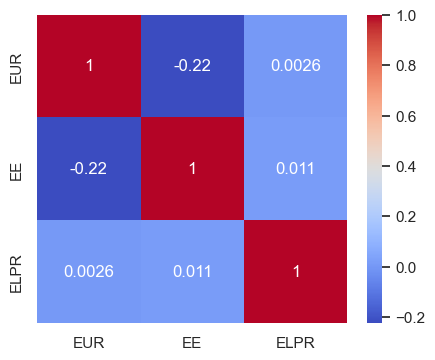

In [36]:
heat_maps=df[['EUR','EE','ELPR']]
heat_maps=heat_maps.corr()

plt.figure(figsize=(5,4))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps,annot=True,cmap='coolwarm');

Plotting a bar chart for the unemployment rate in different regions

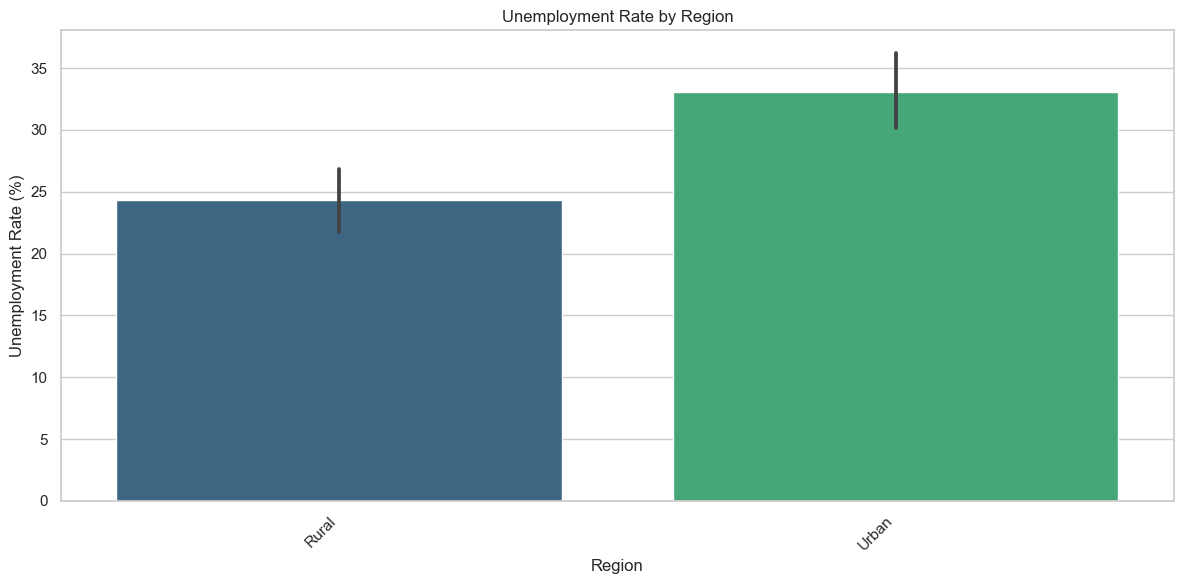

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Unemployment Rate (%)', data=df, palette='viridis')
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

Plotting a histogram of the "EUR" column with different regions colored


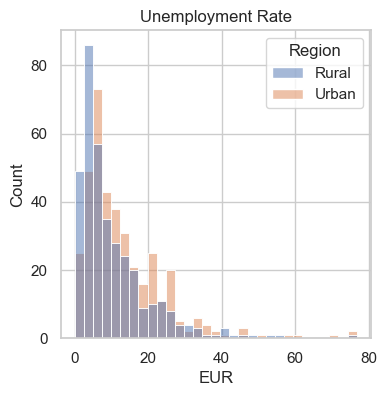

In [42]:
df.columns=["State" , "Date","Frequency", "EUR", "EE", "ELPR","Region","Unemployment Rate (%)","Date"]

plt.figure(figsize=(4,4))
plt.title("Unemployment Rate")
sns.histplot(x="EUR",hue="Region",data=df)
plt.show()

Pair Plot to Explore Relationships:



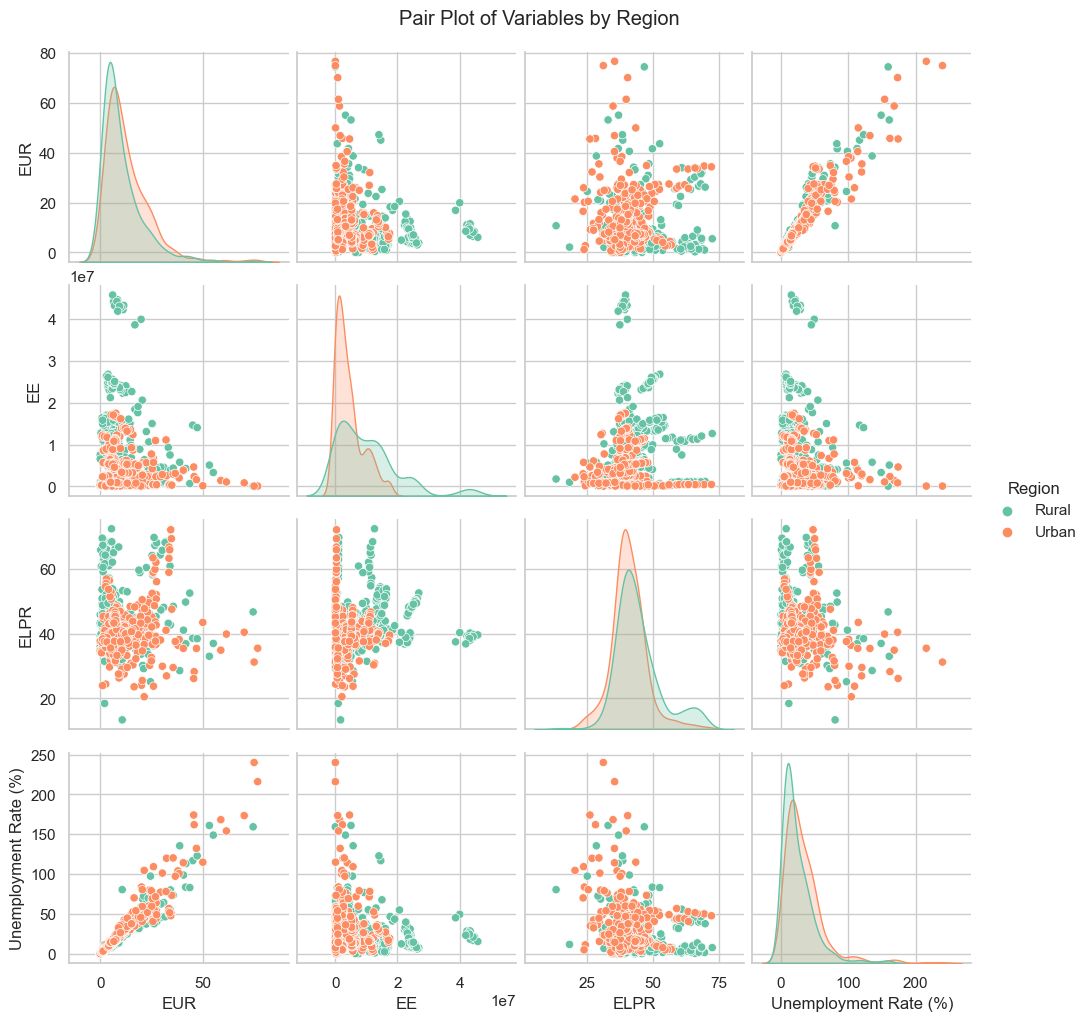

In [43]:
sns.pairplot(df[['EUR', 'EE', 'ELPR', 'Unemployment Rate (%)', 'Region']], hue='Region', palette='Set2')
plt.suptitle('Pair Plot of Variables by Region', y=1.02)
plt.show()
